<a href="https://colab.research.google.com/github/SomyaH99/Bike-Sharing-Demand-Prediction-/blob/main/bike_sharing_demand_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>



## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [38]:
# Importing the  common libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime     #importing for date time application
import datetime as dt
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from graphviz import Source

from IPython.display import SVG
from IPython.display import display


from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb

## <b> Data Initialization </b>

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
file_path = '/content/drive/MyDrive/Colab Notebooks/capestone project 2 /Data & Resources/SeoulBikeData.csv'

df = pd.read_csv(file_path, encoding= 'unicode_escape')

In [41]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [42]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [43]:
#checking info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [44]:
#checking shape of data
df.shape

(8760, 14)

## <b>Preprocessing the data </b>

##**Missing values**

In [45]:
#check for count of missing values in each column.
df.isna().sum()
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


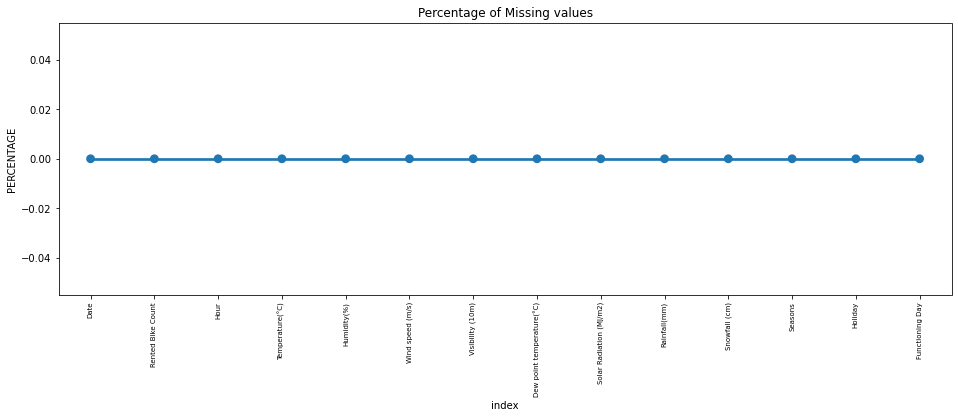

In [46]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

As we can see above there are no missing value present in our dataset

In [47]:
#Checking for the duplicate values
value = len(df[df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


In the above data after count the missing and duplicate value we came to know that there are no missing and duplicate value present.

Some of the columns name in the dataset are too large and clumsy so we change the the into some simple name, and it does not affect our end results.

##**Changing column name**

In [48]:
#Rename the complex columns name
df= df.rename(columns=         {'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

##**Breaking date column**

In [49]:
# Date columns to Date format conversion

df['Date']= pd.to_datetime(df['Date'])

In [50]:
# extracting day,month, day of week and weekdays/weekend from date column

df['Date']=pd.to_datetime(df['Date'])
df['month'] = df['Date'].apply(lambda x : x.month)
df['day_of_week'] = df['Date'].dt.day_name()
df['weekdays_weekend']=df['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
df=df.drop(columns=['Date','day_of_week'],axis=1)

So we convert the "date" column into 3 different column i.e "year","month","day".

The "year" column in our data set is basically contain the 2 unique number contains the details of from 2017 december to 2018 november so if i consider this is a one year then we don't need the "year" column so we drop it.

The other column "day", it contains the details about the each day of the month, for our relevence we don't need each day of each month data but we need the data about, if a day is a weekday or a weekend so we convert it into this format and drop the "day" column.

In [51]:
df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


In [52]:
df['weekdays_weekend'].value_counts()

0    6216
1    2544
Name: weekdays_weekend, dtype: int64

In [53]:
# Numeric Features

numeric_features= df.select_dtypes(exclude='object')

In [54]:
# Numeric Features info
numeric_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  month                  8760 non-null   int64  
 11  weekdays_weekend       8760 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 821.4 KB


##***Exploratory Data Analysis***

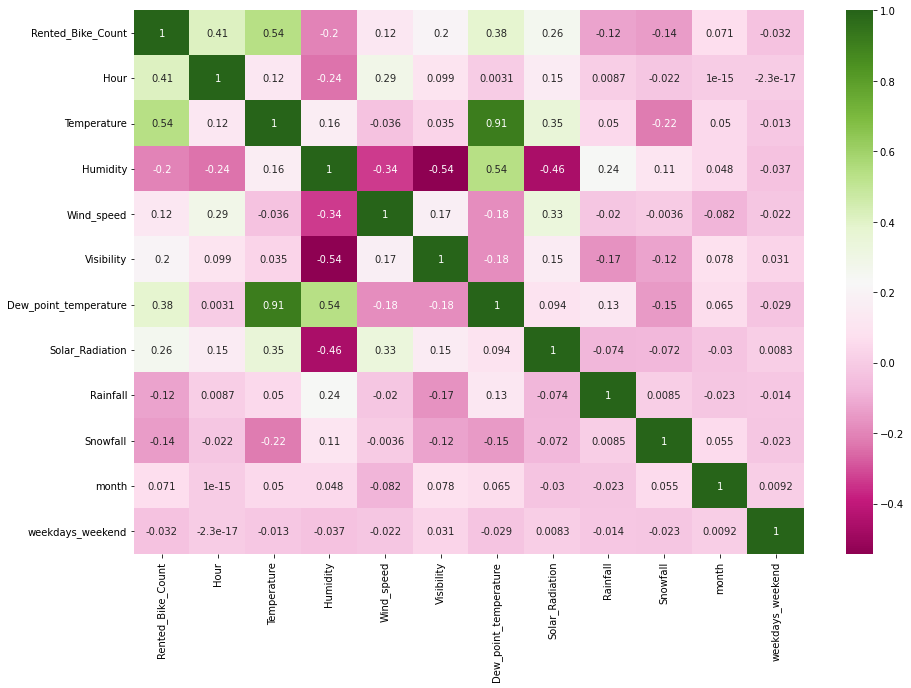

In [55]:
#checking correlation using heatmap

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='PiYG',annot=True)

In [56]:
# Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [57]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented_Bike_Count','Dew_point_temperature(°C)'] ]])

,variables,VIF
0,Hour,4.424147
1,Temperature,34.331857
2,Humidity,6.973710
3,Wind_speed,4.835871
4,Visibility,9.309721
5,Dew_point_temperature,17.758961
6,Solar_Radiation,2.881777
7,Rainfall,1.082987
8,Snowfall,1.125842
9,month,4.690212


Normalizing Rented_Bike_Count column data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


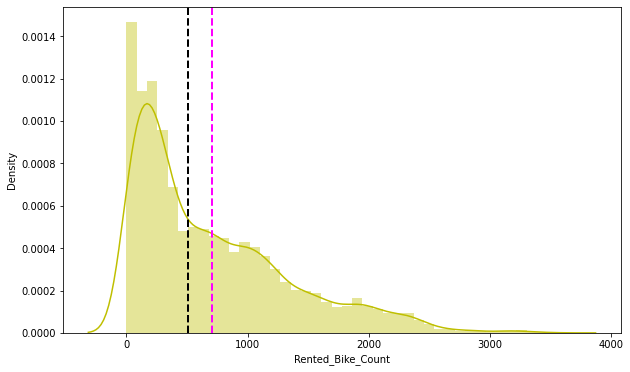

In [58]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(10,6))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax=sns.distplot(df['Rented_Bike_Count'],hist=True ,color="y")
ax.axvline(df['Rented_Bike_Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(df['Rented_Bike_Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

The above graph shows that Rented Bike Count has moderate right skewness. Since the assumption of linear regression is that 'the distribution of dependent variable has to be normal', so we should perform some operation to make it normal.

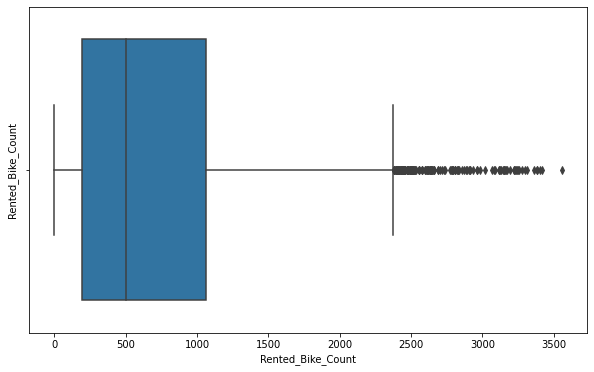

In [59]:
#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10,6))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=df['Rented_Bike_Count'])
plt.show()

The above boxplot shows that we have detect outliers in Rented Bike Count column

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


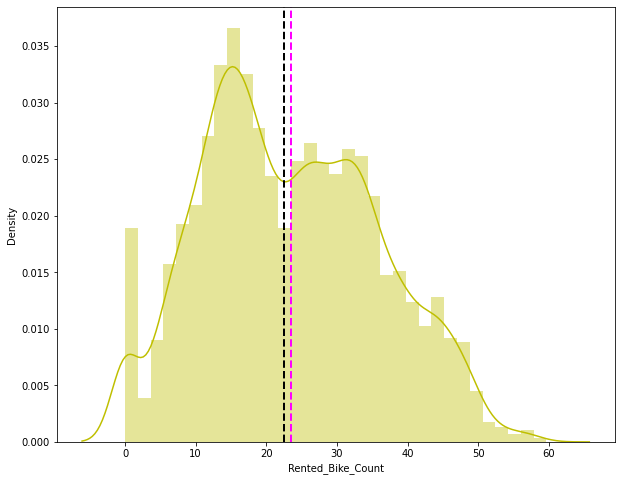

In [60]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(df['Rented_Bike_Count']), color="y")
ax.axvline(np.sqrt(df['Rented_Bike_Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(df['Rented_Bike_Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

Since we have generic rule of applying Square root for the skewed variable in order to make it normal .After applying Square root to the skewed Rented Bike Count, here we get almost normal distribution.

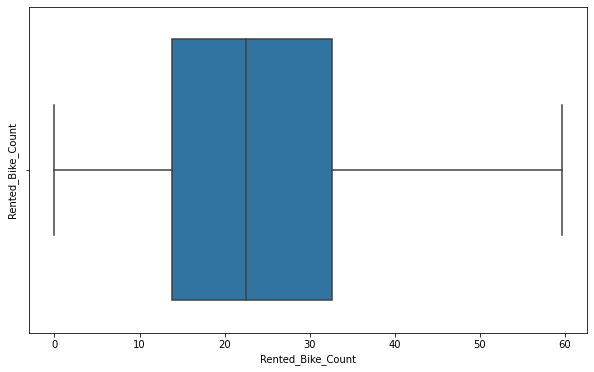

In [61]:
#After applying sqrt on Rented Bike Count check wheater we still have outliers 
plt.figure(figsize=(10,6))

plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(df['Rented_Bike_Count']))
plt.show()

In [62]:
df.corr()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,month,weekdays_weekend
Rented_Bike_Count,1.000000,4.102573e-01,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,7.086107e-02,-3.225936e-02
Hour,0.410257,1.000000e+00,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,1.036729e-15,-2.300554e-17
Temperature,0.538558,1.241145e-01,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,4.968327e-02,-1.297241e-02
Humidity,-0.199780,-2.416438e-01,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,4.779778e-02,-3.674982e-02
Wind_speed,0.121108,2.851967e-01,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,-8.206909e-02,-2.239107e-02
Visibility,0.199280,9.875348e-02,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,7.788783e-02,3.064954e-02
Dew_point_temperature,0.379788,3.054372e-03,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,6.510073e-02,-2.896569e-02
Solar_Radiation,0.261837,1.451309e-01,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,-3.041240e-02,8.271095e-03
Rainfall,-0.123074,8.714642e-03,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,-2.279368e-02,-1.427960e-02
Snowfall,-0.141804,-2.151645e-02,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,5.475846e-02,-2.255705e-02


##**Univariate Analysis**

[Text(0.5, 1.0, 'Count of Rented bikes acording to Month ')]

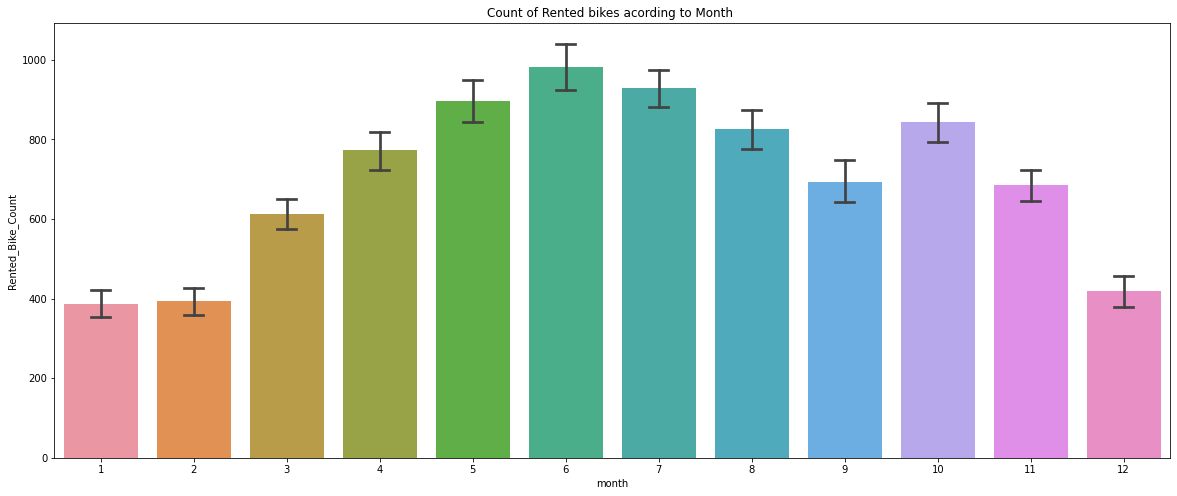

In [63]:
#MONTH
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=df,x='month',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Month ')

From the above bar plot we can clearly say that from the month 5 to 10 the demand of the rented bike is high as compare to other months.these months are comes inside the summer season.

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays and weekend ')]

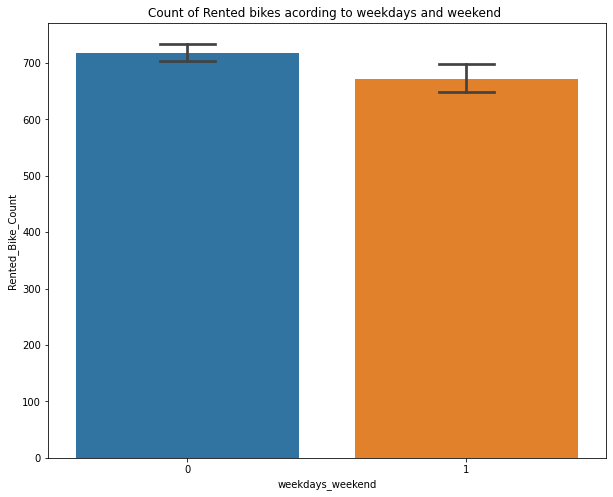

In [64]:
#weekdays_weekend
#anlysis of data by vizualisation 
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df,x='weekdays_weekend',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to weekdays and weekend ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekend ')]

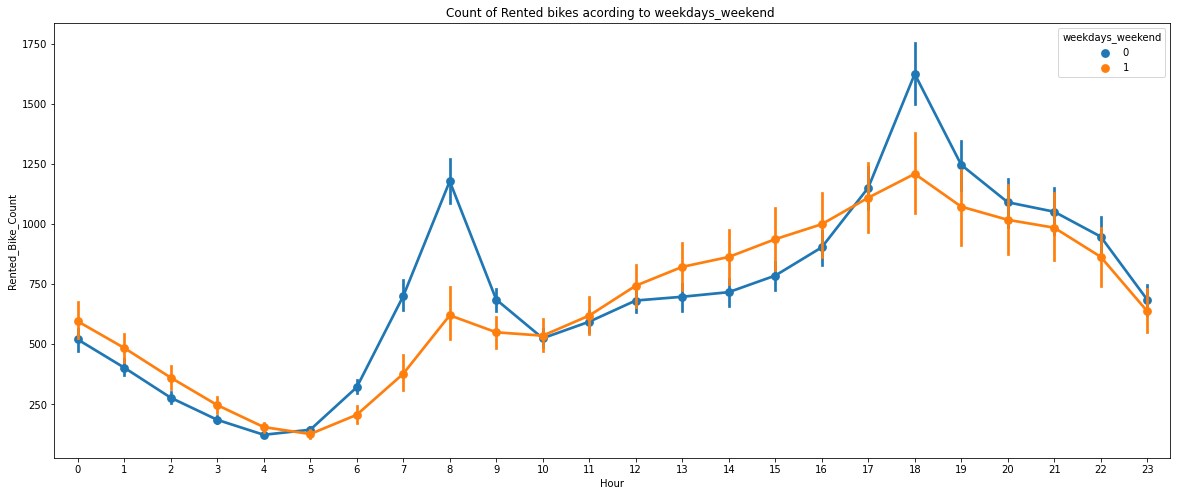

In [65]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data= df,x='Hour',y='Rented_Bike_Count',hue='weekdays_weekend',ax=ax)
ax.set(title='Count of Rented bikes acording to weekdays_weekend ')

From the above point plot and bar plot we can say that in the week days which represent in blue colur show that the demand of the bike higher because of the office.

Peak Time are 7 am to 9 am and 5 pm to 7 pm*

The orange colur represent the weekend days, and it show that the demand of rented bikes are very low specially in the morning hour but when the evening start from 4 pm to 8 pm the demand slightly increases.*

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

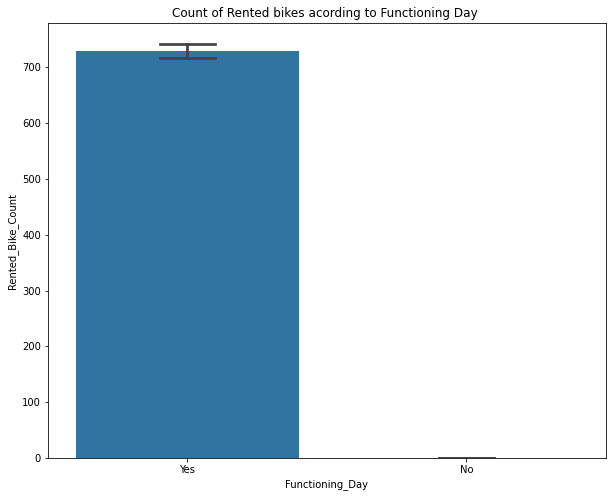

In [66]:
#Functioning Day
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df,x='Functioning_Day',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

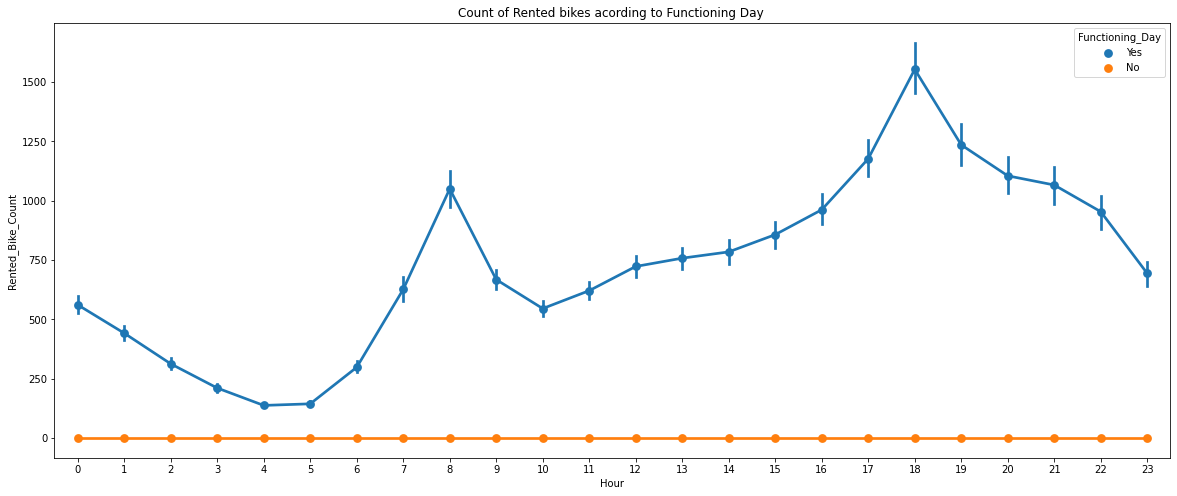

In [67]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df,x='Hour',y='Rented_Bike_Count',hue='Functioning_Day',ax=ax)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

In the above bar plot and point plot which shows the use of rented bike in functioning daya or not, and it clearly shows that,
Peoples do not use reneted bikes in no functioning day.

[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons ')]

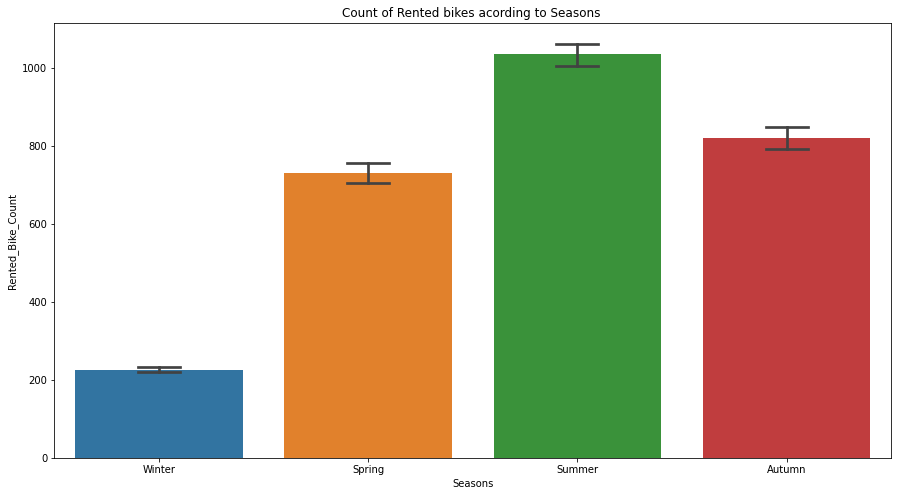

In [68]:
##Seasons
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=df,x='Seasons',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Seasons ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to seasons ')]

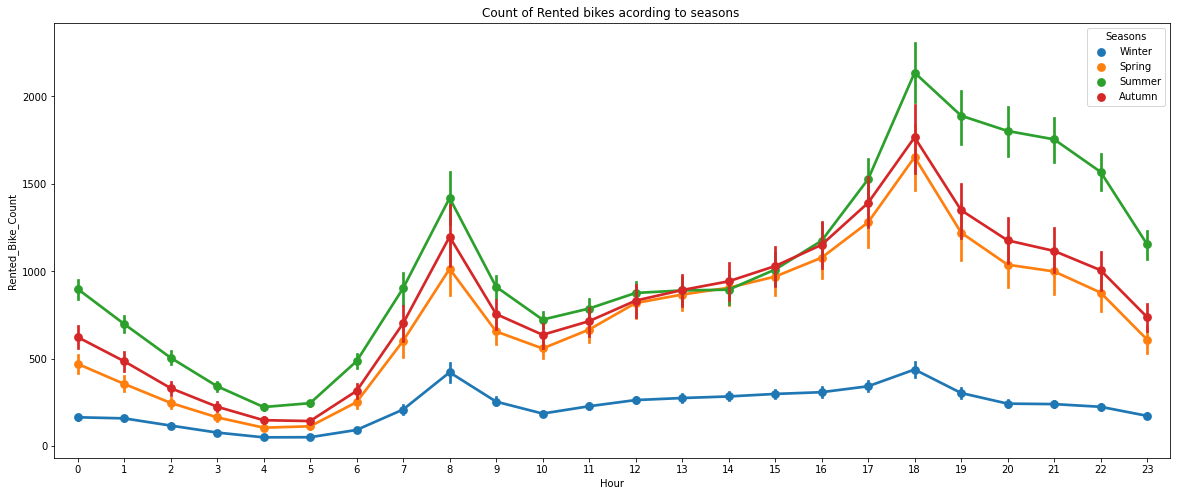

In [69]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df,x='Hour',y='Rented_Bike_Count',hue='Seasons',ax=ax)
ax.set(title='Count of Rented bikes acording to seasons ')

In the above bar plot and point plot which shows the use of rented bike in in four different seasons, and it clearly shows that,

In summer season the use of rented bike is high and peak time is 7am-9am and 7pm-5pm.

In winter season the use of rented bike is very low because of snowfall.

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

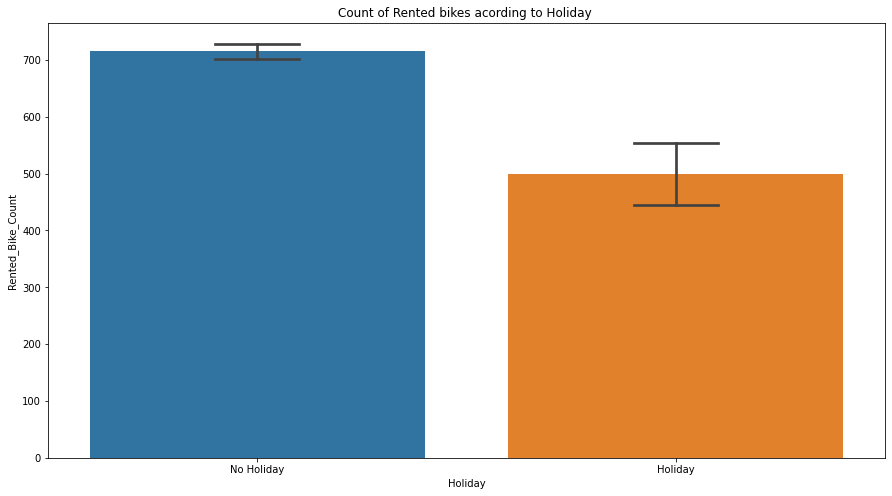

In [70]:
##Holiday
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data= df,x='Holiday',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Holiday ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

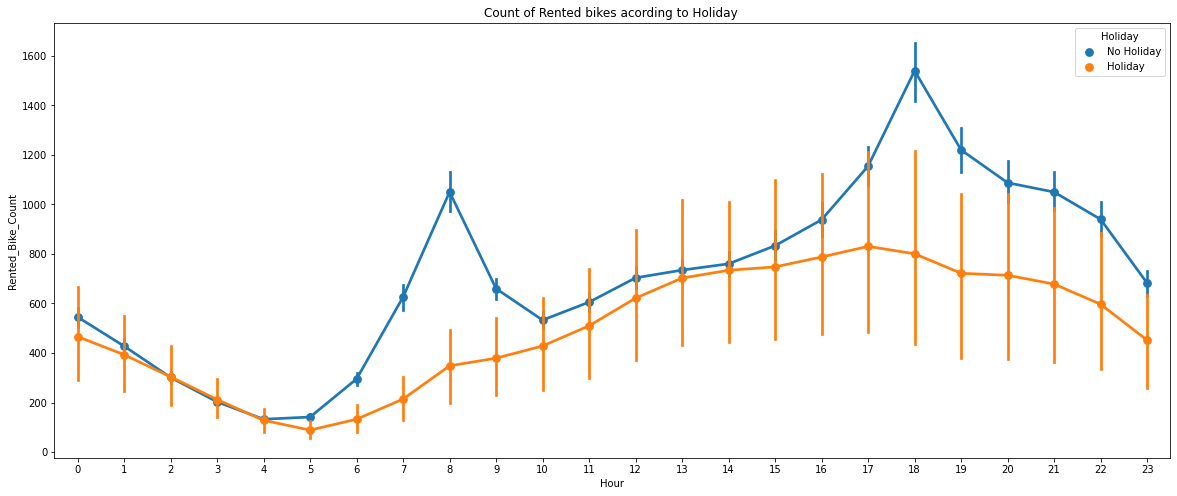

In [71]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df,x='Hour',y='Rented_Bike_Count',hue='Holiday',ax=ax)
ax.set(title='Count of Rented bikes acording to Holiday ')

In the above bar plot and point plot which shows the use of rented bike,

plot shows that people uses the rented bike from 8am-6pm

##**Analyze of Numerical variables**

In [72]:
#assign the numerical coulmn to variavle
numerical_columns=list(df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'month', 'weekdays_weekend'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

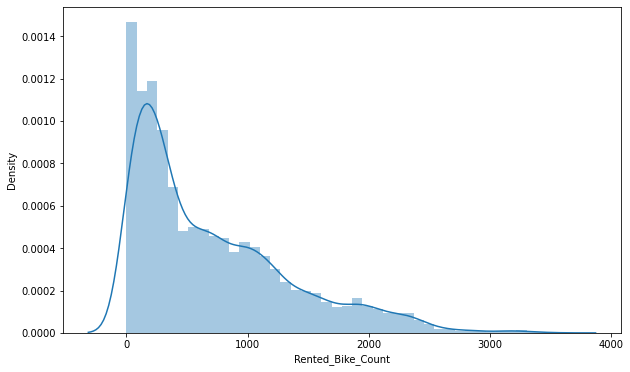

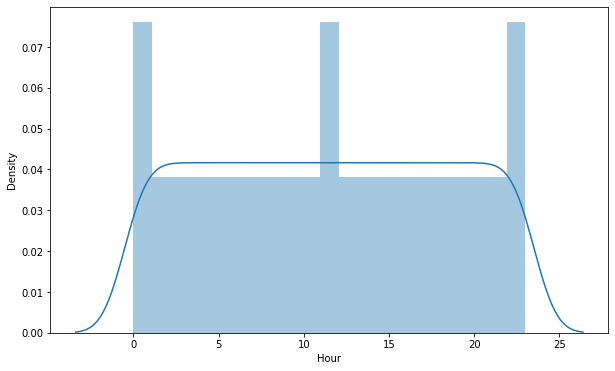

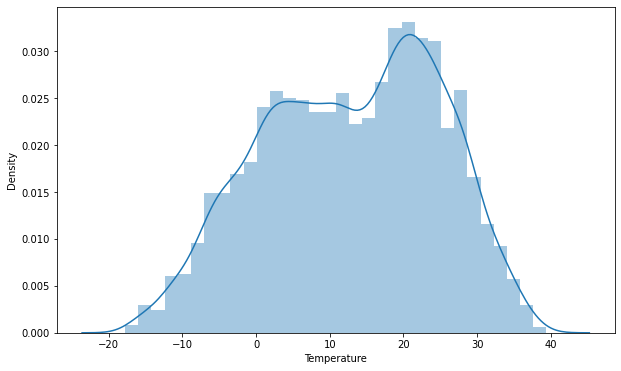

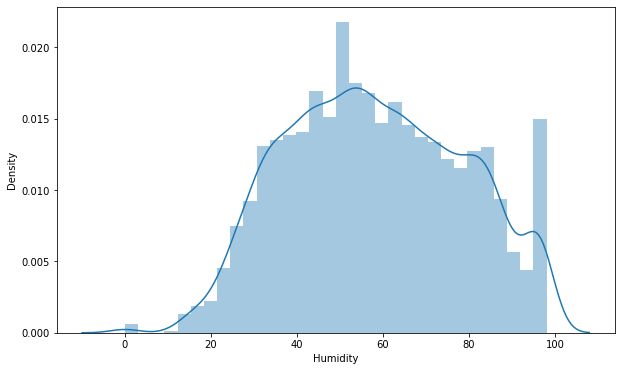

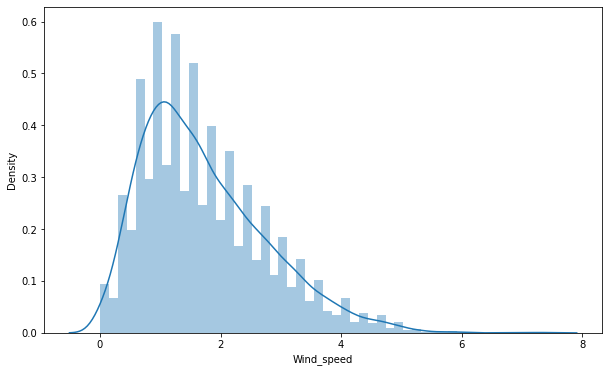

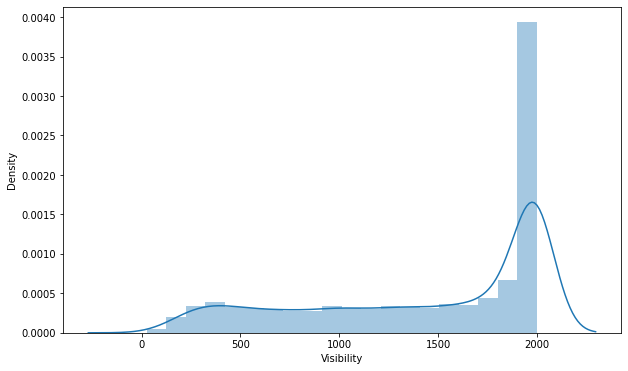

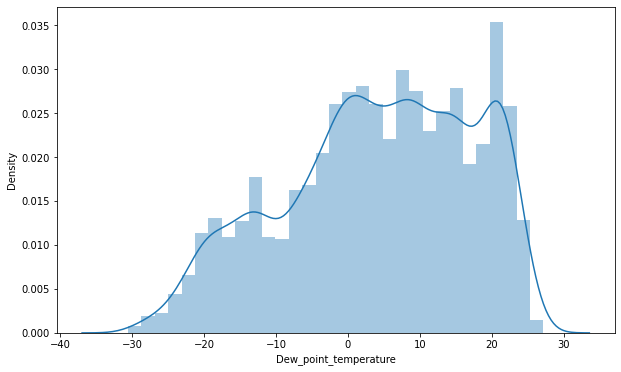

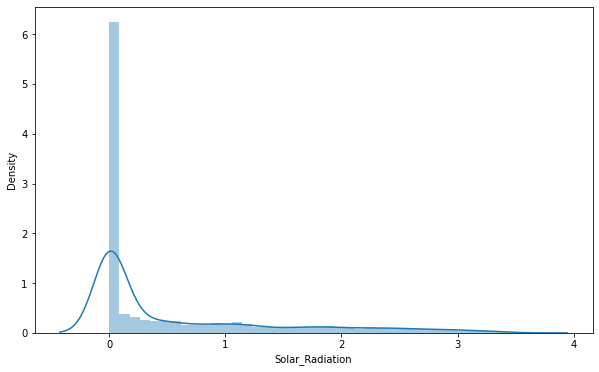

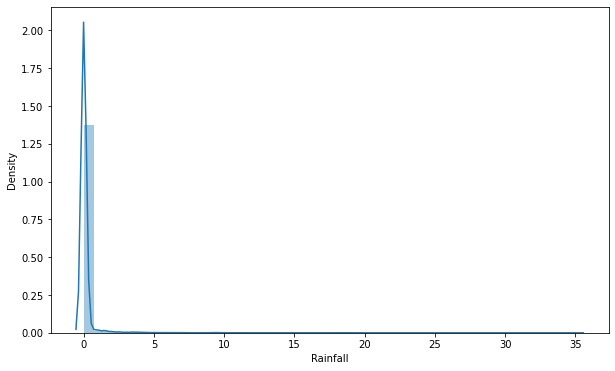

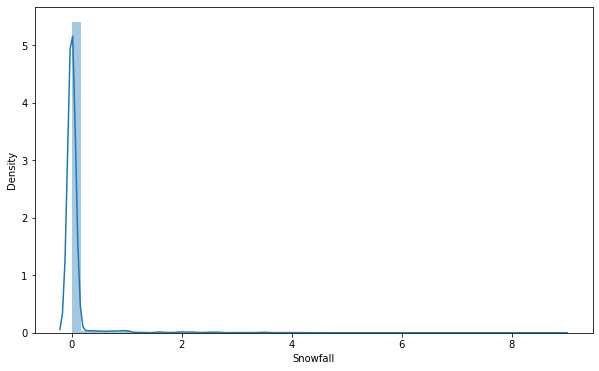

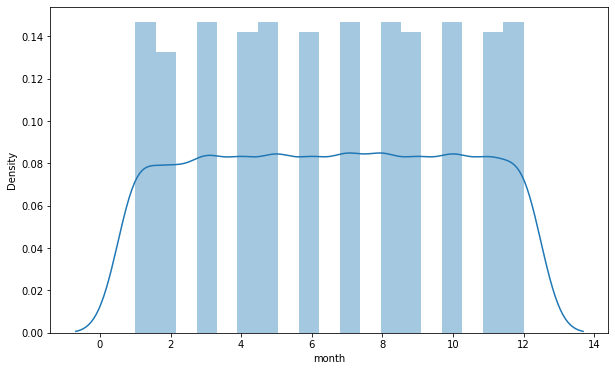

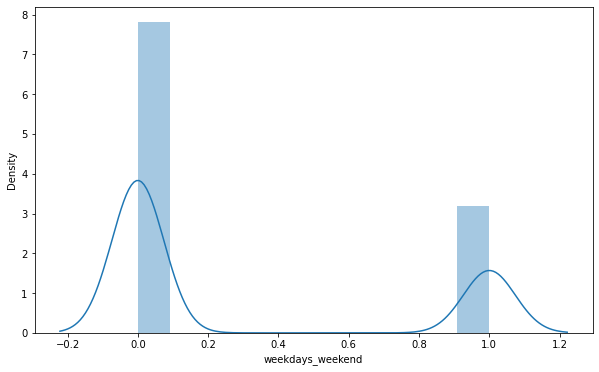

In [73]:
#printing displots to analyze the distribution of all numerical features
for col in numerical_features:
  plt.figure(figsize=(10,6))
  sns.distplot(x= df[col])
  plt.xlabel(col)
plt.show()

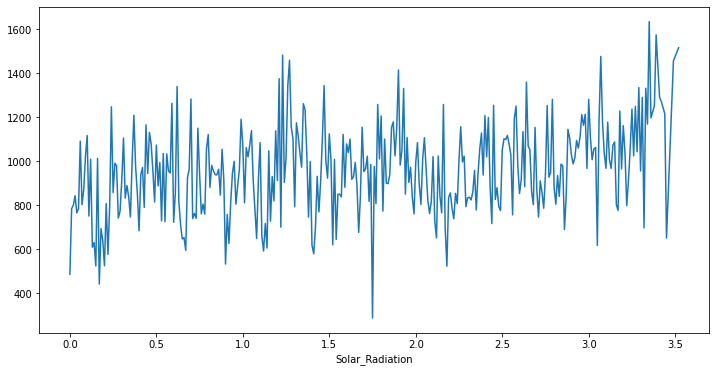

In [74]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Solar_Radiation" 
df.groupby('Solar_Radiation').mean()['Rented_Bike_Count'].plot(figsize=(12,6))

from the above plot we see that, the amount of rented bikes is huge, when there is solar radiation, the counter of rents is around 1000

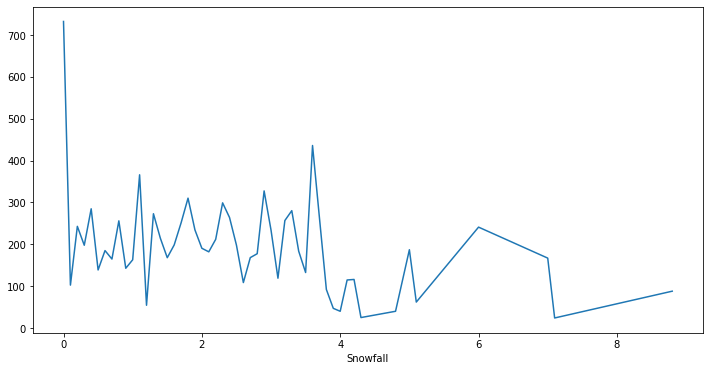

In [75]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Snowfall" 
df.groupby('Snowfall').mean()['Rented_Bike_Count'].plot(figsize=(12,6))

We can see from the plot that, on the y-axis, the amount of rented bike is very low When we have more than 4 cm of snow, the bike rents is much lower

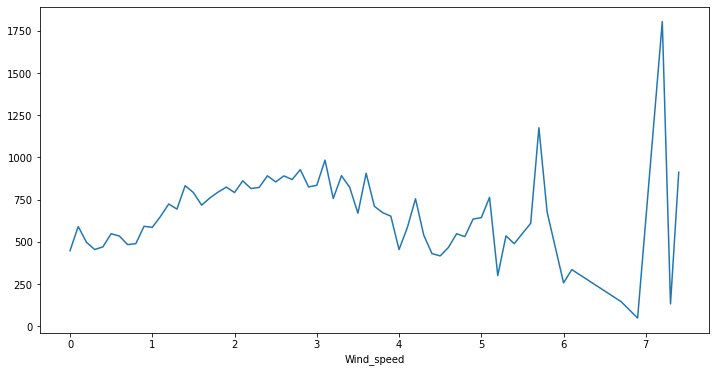

In [76]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Wind_speed" 
df.groupby('Wind_speed').mean()['Rented_Bike_Count'].plot(figsize=(12,6))

We can see from the above plot that the demand of rented bike is uniformly distribute despite of wind speed but when the speed of wind was 7 m/s then the demand of bike also increase that clearly means peoples love to ride bikes when its little windy.

In [77]:
#Extracting categorical features
categorical_features= df.select_dtypes(include='object')

In [78]:
#creating Dummy variable for categorical columns
dummy_categorical_feature= pd.get_dummies(categorical_features,drop_first=True)

In [79]:
dummy_categorical_feature

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning_Day_Yes
0,0,0,1,1,1
1,0,0,1,1,1
2,0,0,1,1,1
3,0,0,1,1,1
4,0,0,1,1,1
...,...,...,...,...,...
8755,0,0,0,1,1
8756,0,0,0,1,1
8757,0,0,0,1,1
8758,0,0,0,1,1


In [80]:
#concating numeric columns and dummy columns and creating final df
final_df= pd.concat([dummy_categorical_feature,numeric_features],axis=1)

In [81]:
#showing head of final df
final_df.head()

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning_Day_Yes,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,month,weekdays_weekend
0,0,0,1,1,1,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,0
1,0,0,1,1,1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,0
2,0,0,1,1,1,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,0
3,0,0,1,1,1,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,0
4,0,0,1,1,1,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,0


In [82]:
#describing final DF
final_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Seasons_Spring,8760.0,0.252055,0.434217,0.0,0.00,0.00,1.00,1.00
Seasons_Summer,8760.0,0.252055,0.434217,0.0,0.00,0.00,1.00,1.00
Seasons_Winter,8760.0,0.246575,0.431042,0.0,0.00,0.00,0.00,1.00
Holiday_No Holiday,8760.0,0.950685,0.216537,0.0,1.00,1.00,1.00,1.00
Functioning_Day_Yes,8760.0,0.966324,0.180404,0.0,1.00,1.00,1.00,1.00
Rented_Bike_Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature,8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity,8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind_speed,8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40


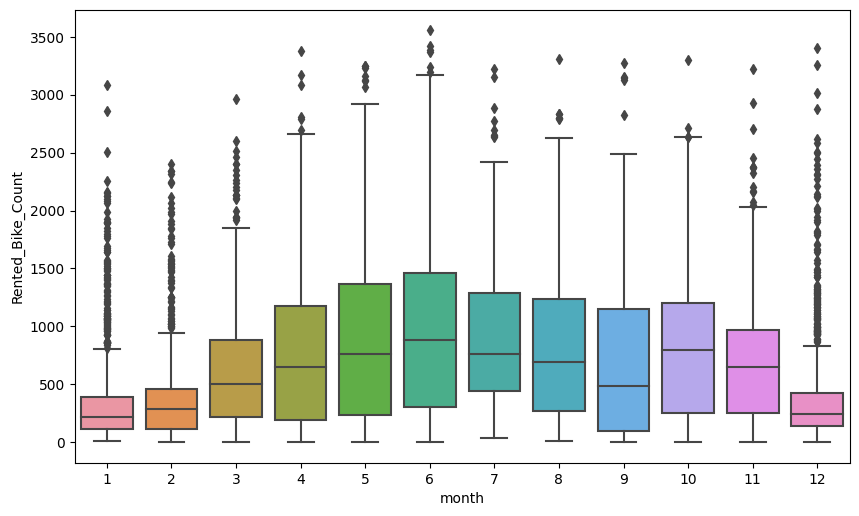

In [83]:
plt.figure(figsize=(10,6),dpi=100)
sns.boxplot(x='month',y='Rented_Bike_Count', data=df)
plt.show()

we can see that there less demand of Rented bike in the month of December, january,February i.e during winter seasons

Also demand of bike is maximum during May,june,july i.e Summer seasons

##***Creating Function to train linear models and calculate scores***

In [84]:
#creating list of matrix to store the evaluation matrix of all model
mean_sq_error=[]
root_mean_sq_error=[]
r2_list=[]
adj_r2_list=[]

In [85]:
# making a function to train and evaluate linear model
def train_linear_model (model,X_train,y_train,X_test,y_test):

#training the model
  model.fit(X_train,y_train)

  #predicting the values
  pred = model.predict(X_test)
  import math
  from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

  print('\n================Evalution Matrix=========================\n')

  #finding mean_squared_error
  MSE  = mean_squared_error(y_test**2,pred**2)
  print("MSE :" , MSE)

  #finding root mean squared error
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  #finding the r2 score
  r2 = r2_score(y_test**2,pred**2)
  print("R2 :" ,r2)
  #finding the adjusted r2 score
  adj_r2=1-(1-r2_score(y_test**2,pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",adj_r2)
  
  print('\n================Evalution Matrix=========================\n')
  

#appending metrice to list
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)
    
  # ploting the line graph of actual and predicted values
  print('\
  =========================================================\
  Evalution Graph\
  ===================================================\n')  
  plt.figure(figsize=(20,10))
  plt.plot((pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.show()

creating function to run diffirent models

In [86]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    import math
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import r2_score
    print('\n================Evalution Matrix=========================\n')
    MSE  = mean_squared_error(y_test,preds)
    print("MSE :" , MSE)
    
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)
    r2 = r2_score(y_test,preds)
    print("R2 :" ,r2)
    adj_r2=1-(1-r2_score(y_test,preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2)

    train_class_preds = linear_model.predict(X_train)

    print('\n================Evalution Matrix=========================\n')

    mean_sq_error.append(MSE)
    root_mean_sq_error.append(RMSE)
    r2_list.append(r2)
    adj_r2_list.append(adj_r2)

    #ploting 
    print('\
    =========================================================\
    Evalution Graph\
    ===================================================\n') 
    plt.figure(figsize=(20,10))
    plt.plot(np.array(y_test[:100]))
    plt.plot(preds[:100])    
    plt.legend(["ACTUAL","PREDICTED"],prop={'size': 20})
    plt.show()

creating function to get feature importance

In [87]:
def get_features_importance (optimal_model,X_train):
  '''
  shows the graph of feature importance
  '''
  features = X_train.columns
  importances = optimal_model.feature_importances_
  indices = np.argsort(importances)

  plt.figure(figsize=(15,10))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='red', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()

##**lime tablular**

In [88]:
pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [89]:
# LIME SECTION

import lime
import lime.lime_tabular
def LimeTabularExplainer_table(model,instance,num_features,dependent_var):
  
  # vaariable to store feature names
  # X=df.drop(dependent_var,axis=1)
  # feature_names =list(X.columns)
  X=X_test
  feature_names =list(X_test.columns)

  explainer = lime.lime_tabular.LimeTabularExplainer(X.values,feature_names=feature_names,mode='regression')

  # selecting the instace to explain
  choosen_instance = X.reset_index(drop=True).loc[[instance]].values[0]
  exp = explainer.explain_instance(choosen_instance, model.predict, num_features=num_features)
  exp.show_in_notebook(show_table=True)

##**Train | Test Split for Linear Regression Analysis**

In [90]:
# Train - Spliting  data
X = final_df.drop(['Rented_Bike_Count'],axis=1)

In [91]:
X.shape


(8760, 16)

In [92]:
y=np.sqrt(final_df['Rented_Bike_Count'])

In [93]:
#spliting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [94]:
#scaling data
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

##**Linear Regresseion**

In [95]:
from sklearn.linear_model import LinearRegression

In [96]:
#linear regression model

linear_model= LinearRegression()


================Evalution Matrix=========================

MSE : 175590.55287332062
RMSE : 419.035264474627
R2 : 0.5729108337712393
Adjusted R2 :  0.5697661367350404

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



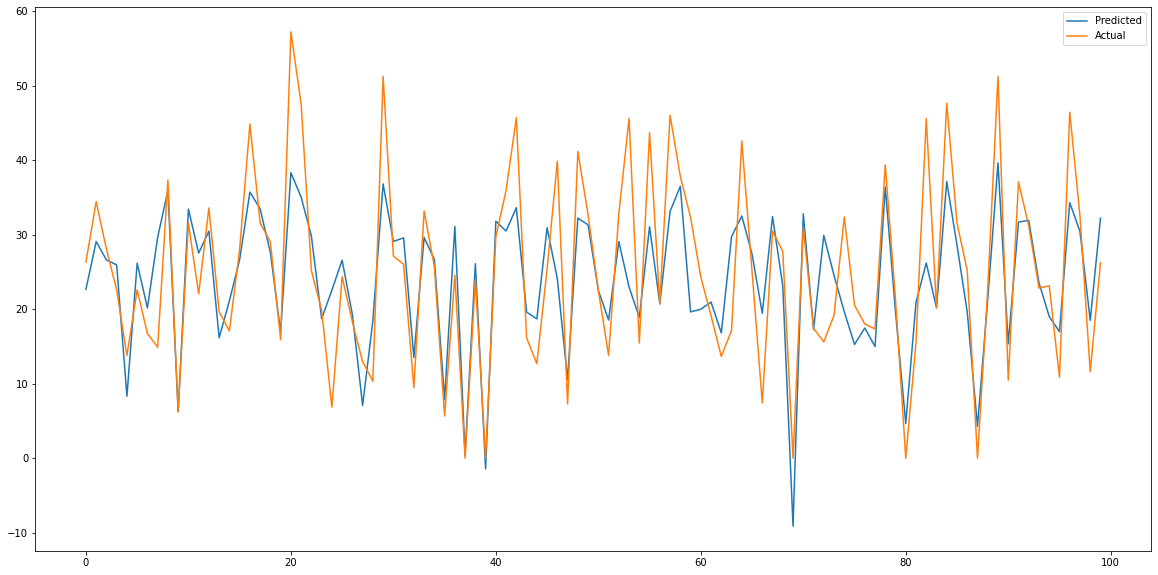

In [97]:
train_linear_model(linear_model, X_train, y_train, X_test, y_test)

##**Regularisation**

###**Lasso Regression**

In [98]:
from sklearn.linear_model import Lasso

In [99]:
# finding the best parameters for lasso by gridsearchcv
from sklearn.model_selection import GridSearchCV
lasso_model = Lasso()
#setting the parameters of the lasso model
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_grid = GridSearchCV(lasso_model, parameters, scoring='neg_mean_squared_error', cv=5)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.411e+05, tolerance: 8.227e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.422e+05, tolerance: 8.120e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa


================Evalution Matrix=========================

MSE : 175560.90711843758
RMSE : 418.9998891627987
R2 : 0.5729829411854939
Adjusted R2 :  0.569838775082856

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



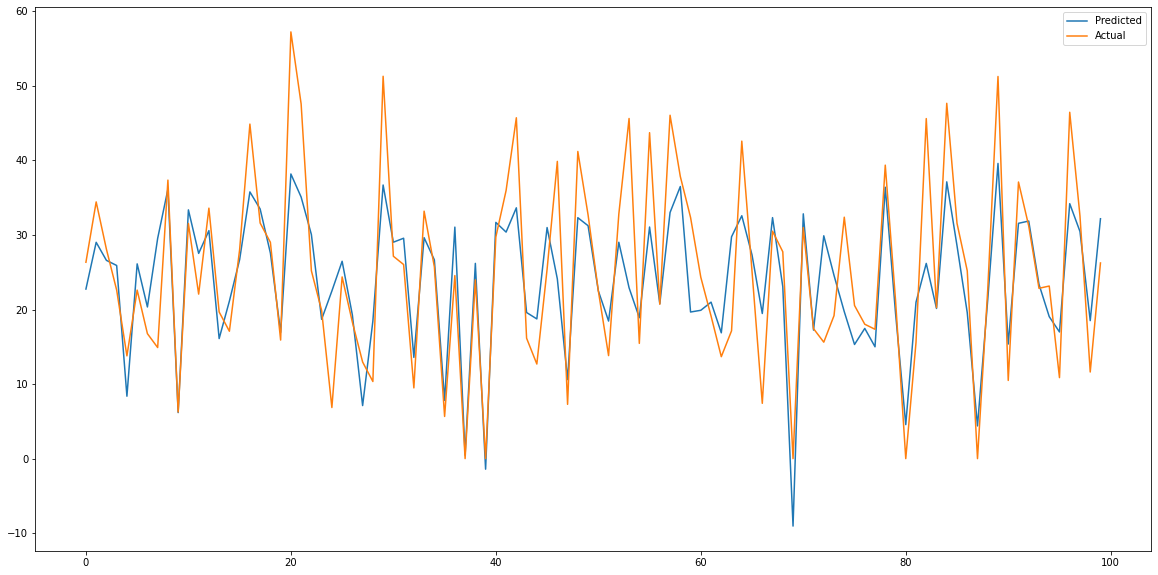

In [100]:
# calling train_linear_model to train,fit and evalution of lasso model
train_linear_model(lasso_grid,X_train,y_train,X_test,y_test)

##**Ridge Regression**

In [101]:
from sklearn.linear_model import Ridge
ridge = Ridge()

# finding the best parameters for ridge model by gridsearchcv

parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
ridge_grid = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)


================Evalution Matrix=========================

MSE : 175248.93506569506
RMSE : 418.6274418450074
R2 : 0.5737417512792726
Adjusted R2 :  0.5706031723655443

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



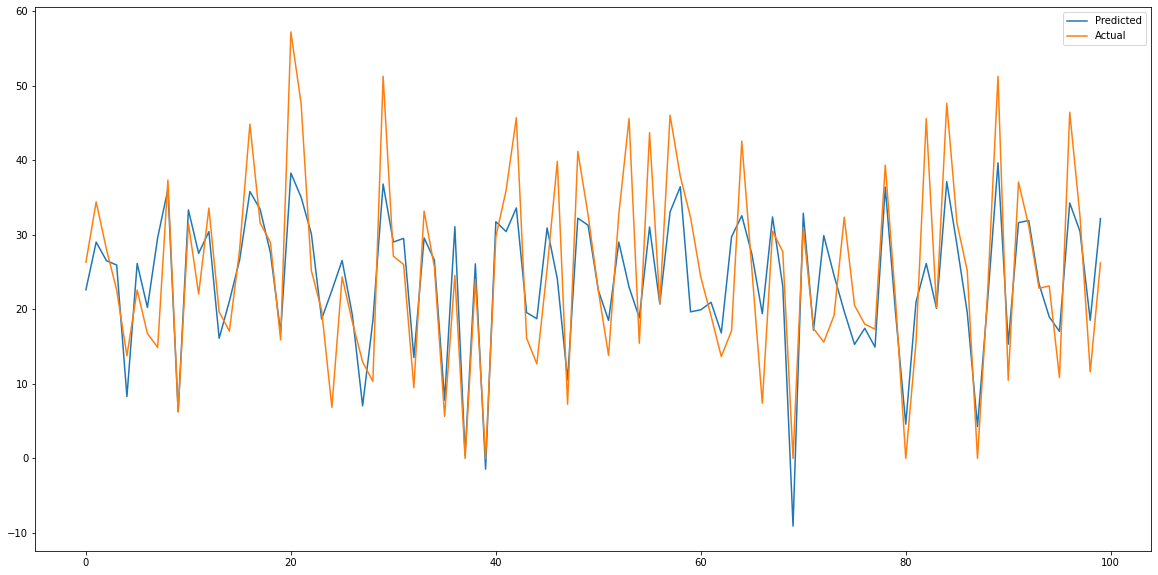

In [102]:
# calling train_linear_model to train,fit and evalution of ridge model

train_linear_model(ridge_grid,X_train,y_train,X_test,y_test)

##**ElasticNet Regression**

In [103]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()

# finding the best parameters for ridge model by gridsearchcv

parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.1,0.2,0.3,0.4,0.5]}
elastic_grid = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.411e+05, tolerance: 8.227e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.422e+05, tolerance: 8.120e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa


================Evalution Matrix=========================

MSE : 175346.86749857932
RMSE : 418.74439399062925
R2 : 0.5735035500752621
Adjusted R2 :  0.5703632172640354

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



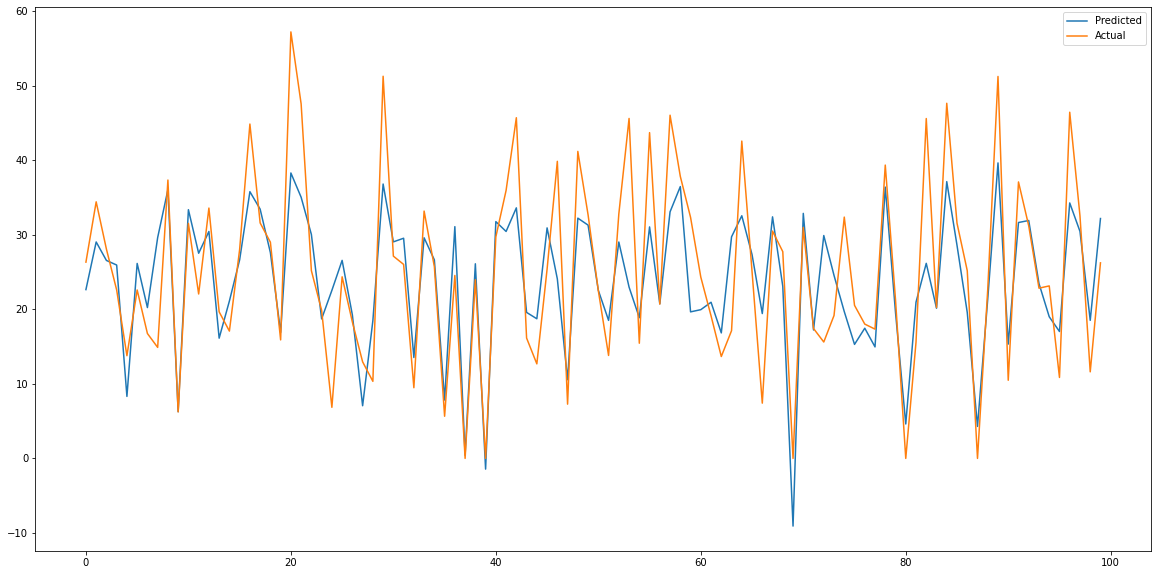

In [104]:
# calling train_linear_model to train,fit and evalution of elasticnet model
train_linear_model(elastic_grid,X_train,y_train,X_test,y_test)

##**Polynomial Regression**

In [105]:
#creating pipeline to convert x to polynomial feature and apply Linear Regression

from sklearn.pipeline import make_pipeline
#importing polynomial features
from sklearn.preprocessing import PolynomialFeatures

In [106]:
pipe=make_pipeline(PolynomialFeatures(degree=2),LinearRegression())


================Evalution Matrix=========================

MSE : 116294.5376400951
RMSE : 341.01984933445607
R2 : 0.717136620934838
Adjusted R2 :  0.7150538717102441

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



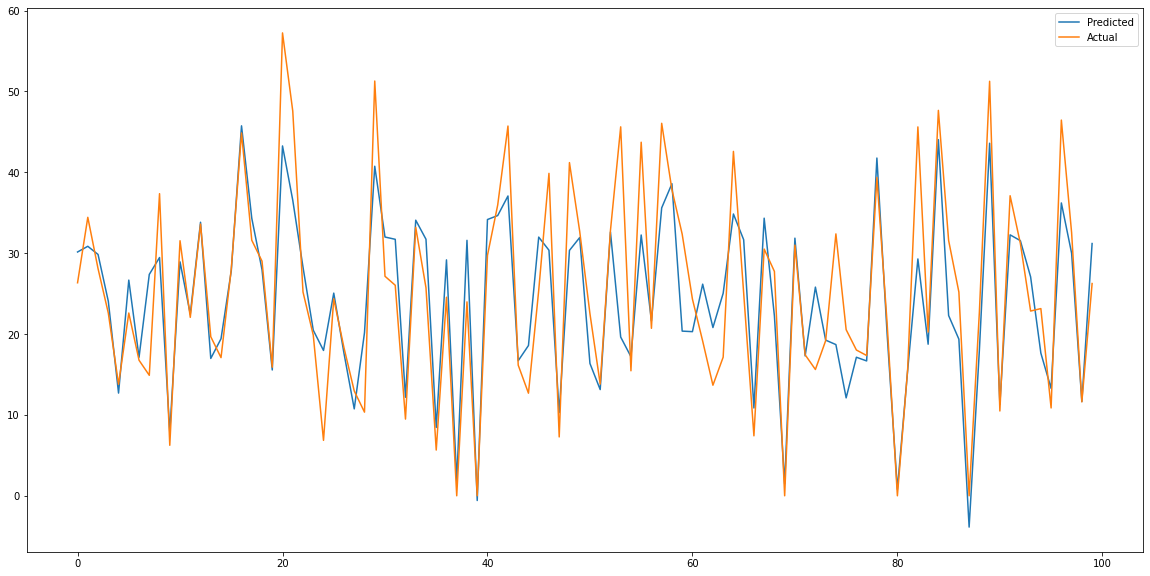

In [107]:
# calling train_linear_model to train,fit and evalution of polynomial model
train_linear_model(pipe,X_train,y_train,X_test,y_test)

##**Train | Test split Data For Tree based method**

In [108]:
#creatin X for independent variable
X=final_df.drop(['Rented_Bike_Count'],axis=1)

In [109]:
#creating y for dependent variable
y=final_df['Rented_Bike_Count']

In [110]:
#spliting X and y to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

##**Decision Tree Regression**

In [111]:
from sklearn.tree import DecisionTreeRegressor


================Evalution Matrix=========================

MSE : 89841.13515981735
RMSE : 299.735108320359
R2 : 0.7804474112974988
Adjusted R2 :  0.7788308252785204

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


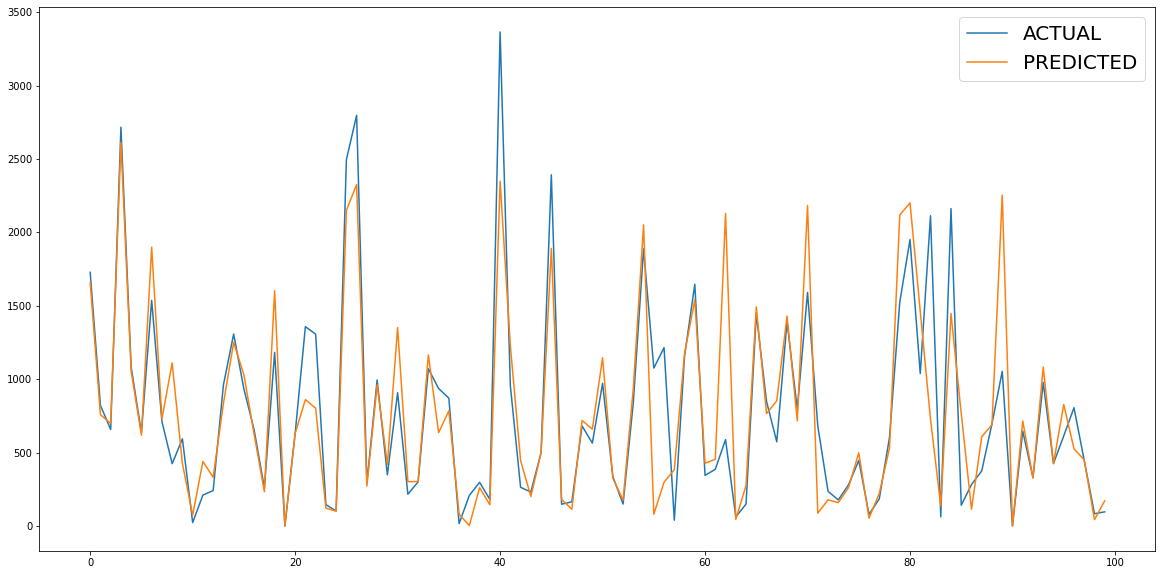

In [112]:
#creating decision tree model
dt_model = DecisionTreeRegressor()
#calling run_model to train,fit and evalution of decision tree model
run_model(dt_model,X_train,y_train,X_test,y_test)

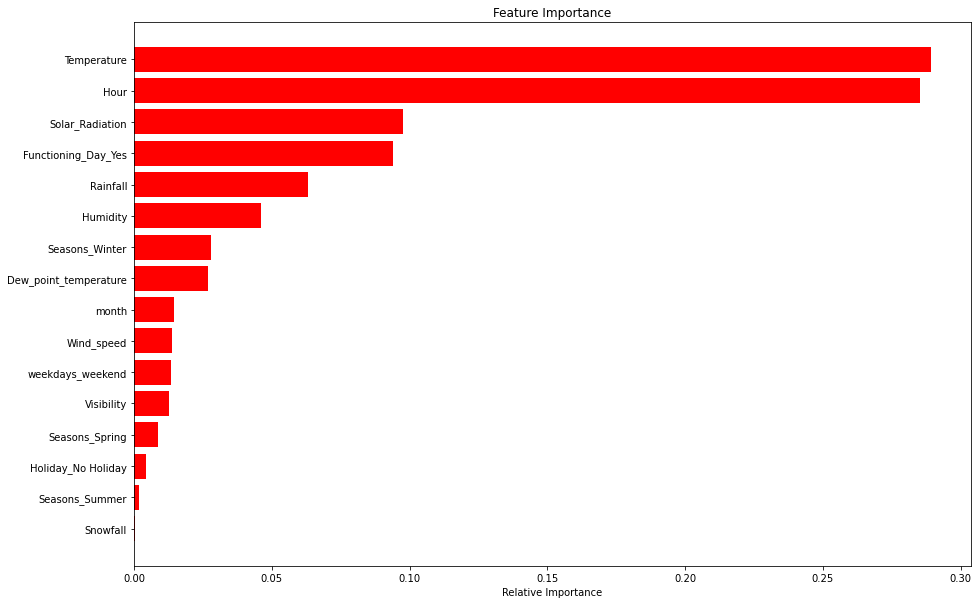

In [113]:
#getting features importance of decision tree
get_features_importance(dt_model,X_train)

##**Random Forest**

In [114]:
#importing Random forest
from sklearn.ensemble import RandomForestRegressor

In [115]:
#creating model of random forest
rf_model = RandomForestRegressor()

In [116]:
#creating param dict to check random forest with diffirent value of parameter through gridsearch
n_estimators=[60,80,100]
max_depth=[15,20]
max_leaf_nodes=[40,60,80]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}

In [117]:
#creating rf_grid model to run rf model with gridsearch
rf_grid= GridSearchCV(rf_model,param_grid=params,verbose=0)


================Evalution Matrix=========================

MSE : 63020.68827138614
RMSE : 251.03921660048684
R2 : 0.8459908679116437
Adjusted R2 :  0.8448568844264096

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


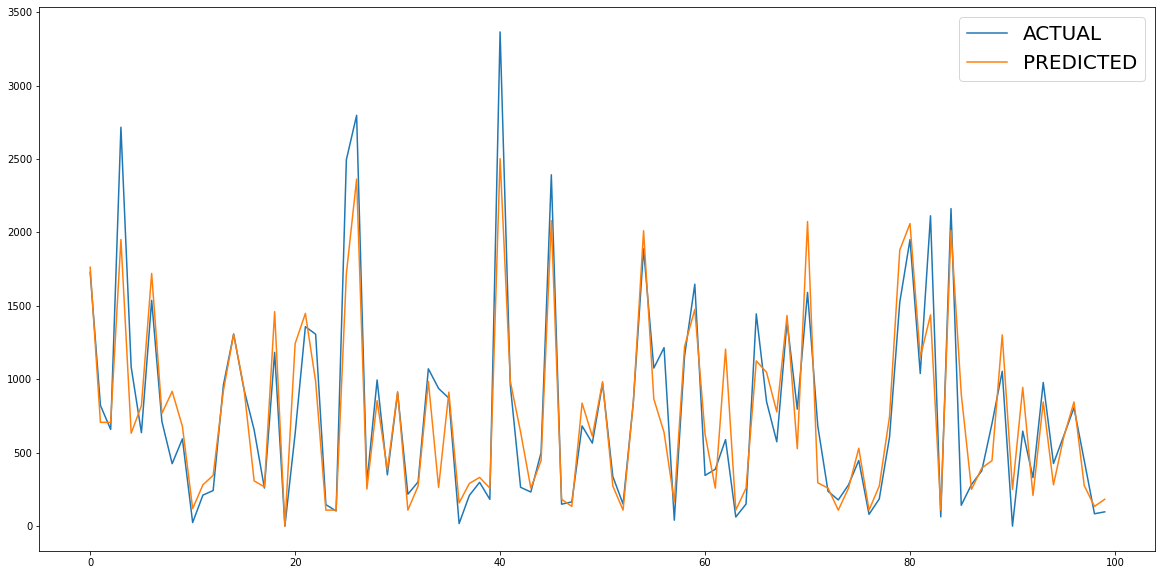

In [118]:
#calling run_model to train,fit and evalution of decision tree model
run_model(rf_grid,X_train,y_train,X_test,y_test)

In [119]:
#optimal rf model
optimal_rf_model=rf_grid.best_estimator_

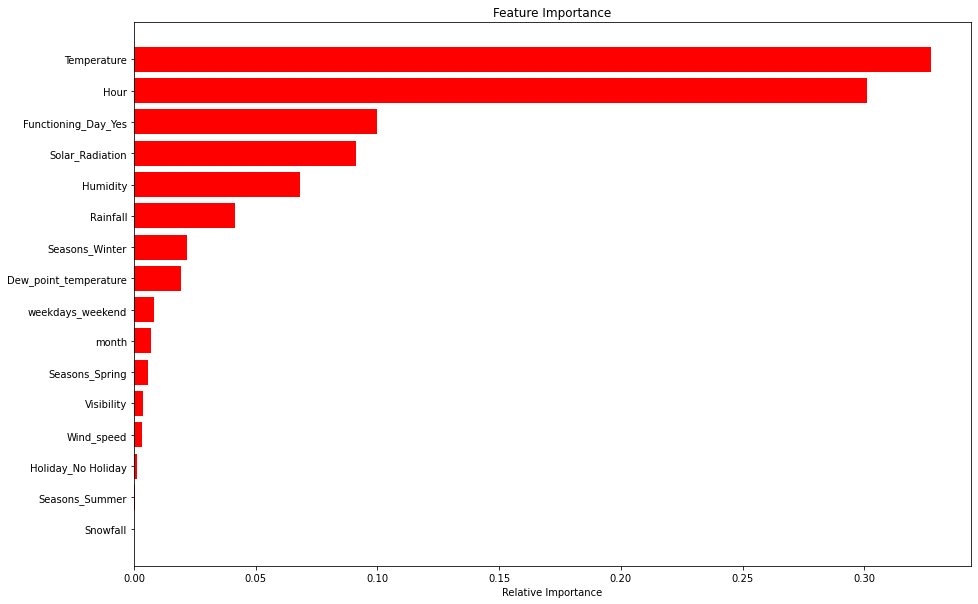

In [120]:
#getting and visualizing features importance  of rf model
get_features_importance(optimal_rf_model,X_train)

##**Gradient Boosting**

In [121]:
#importing Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

In [122]:
#creating model of Gradient Boosting
gb_model=GradientBoostingRegressor()

In [123]:
# creating param dict to check diffirent value of parameter
n_estimators=[80,100,150]
max_depth=[15,20,30]

params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [124]:
#grid search for gradient bossting
gb_grid= GridSearchCV(gb_model,param_grid=params,verbose=0)


================Evalution Matrix=========================

MSE : 54976.73346882324
RMSE : 234.4711783329099
R2 : 0.8656485792391659
Adjusted R2 :  0.8646593373007521

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


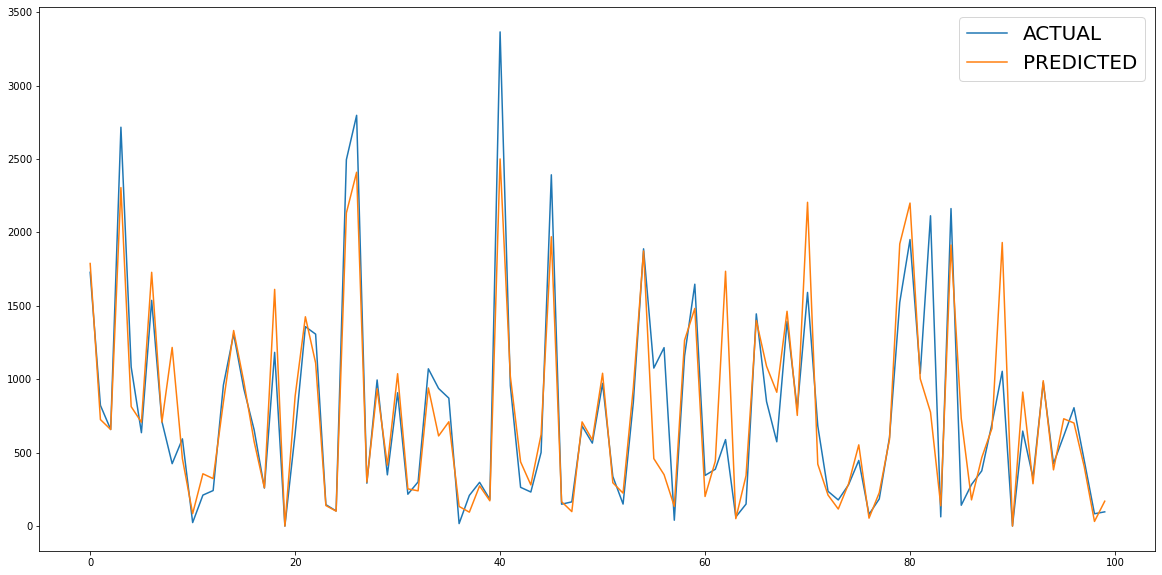

In [125]:
#calling run_model to train,fit and evalution of gradient boosting model
run_model(gb_grid,X_train,y_train,X_test,y_test)

In [126]:
#getting best estimator of GB model given by gb_grid model
optimal_gb_model=gb_grid.best_estimator_

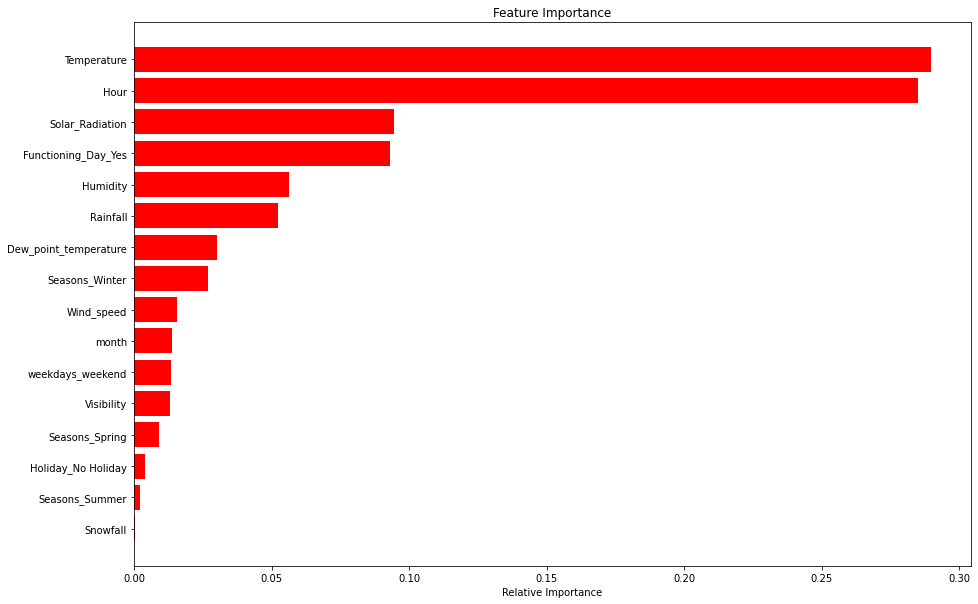

In [127]:
#getting and visualizing features_importance of gradient boosting
get_features_importance(optimal_gb_model,X_train)

##**eXtreme Gradient Boosting**

In [128]:
#importing XGBoost Regressor
from xgboost import XGBRegressor

In [129]:
#creating Xgboost model
xgb_model=XGBRegressor()

In [130]:
#creating param dict for gridsearch
n_estimators=[80,100,150]
max_depth=[15,20,30]


params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [131]:
#creating xgb grid model
xgb_grid= GridSearchCV(xgb_model,param_grid=params,verbose=0)

[13:14:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:14:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:14:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:14:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:14:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:14:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:14:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:14:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


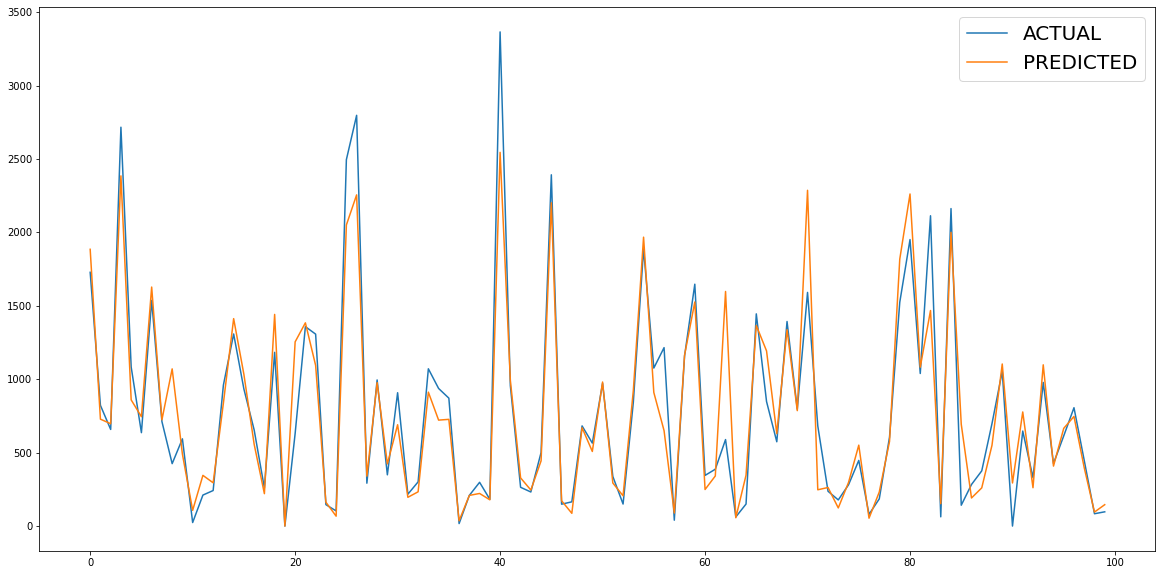

In [132]:
#calling run_model to train,fit and evalution of xgb_grid model
run_model(xgb_grid,X_train,y_train,X_test,y_test);

In [133]:
#getting best estimator of xgb model given by xgb grid model
optimal_xgb_model=xgb_grid.best_estimator_

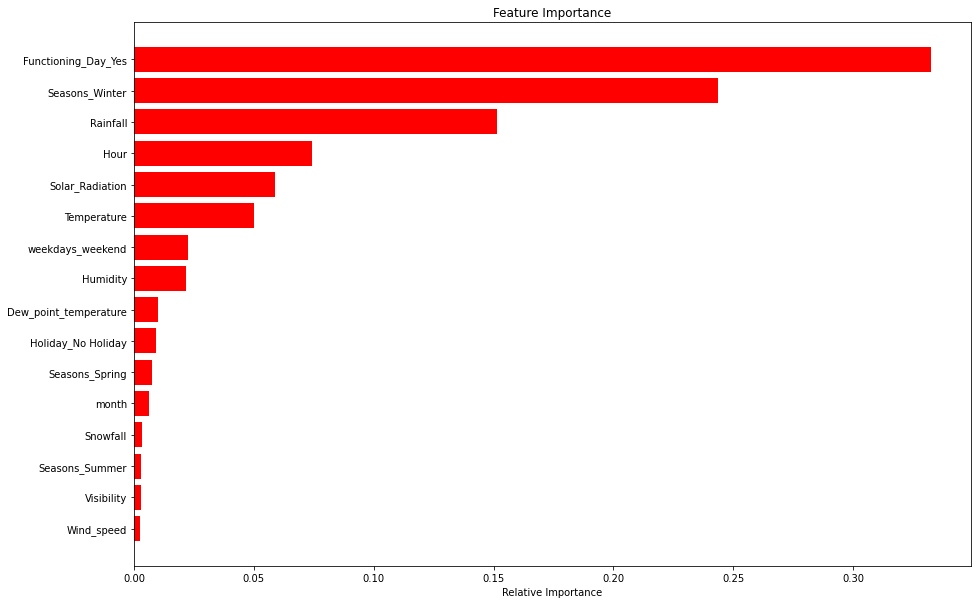

In [134]:
#getting best param of rf model given by xgb_grid model
get_features_importance(optimal_xgb_model,X_train)

##**CatBoost**

In [135]:
#installing catboost
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [136]:
#importing cat boost Regressor
from catboost import CatBoostRegressor

In [137]:
# creating Catboost model
cb_model=CatBoostRegressor(verbose=0)



================Evalution Matrix=========================

MSE : 36706.5353729677
RMSE : 191.58949703198164
R2 : 0.910297049908164
Adjusted R2 :  0.9096365587892181

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


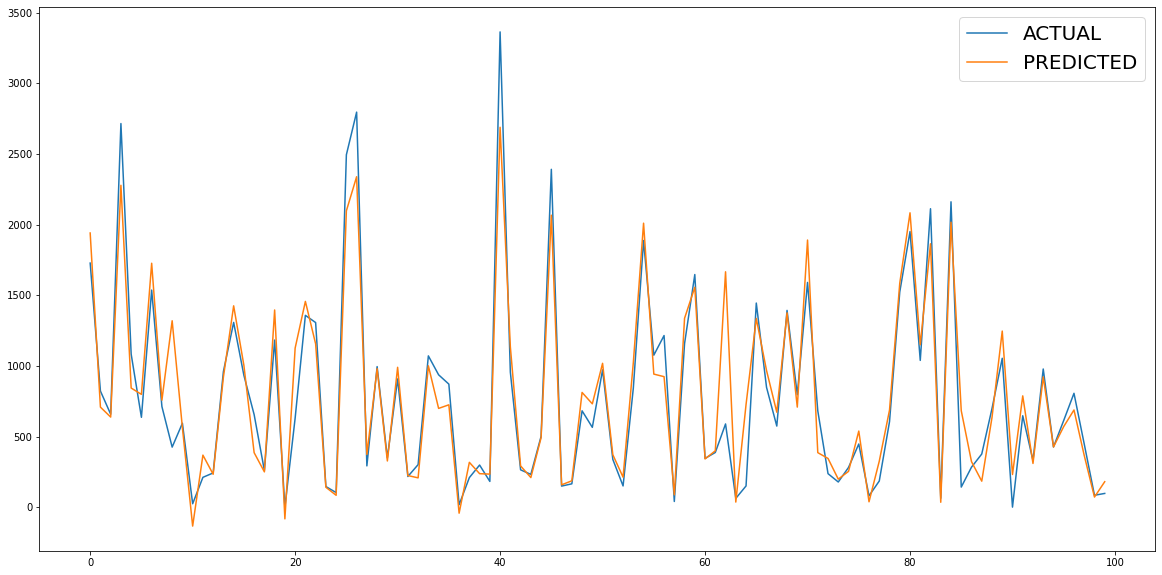

In [138]:
#calling run_model to train,fit and evalution of catboost model
run_model(cb_model,X_train,y_train,X_test,y_test)

In [139]:
#checking params of cat boost model
cb_model.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'random_seed': 0,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'RMSE',
 'learning_rate': 0.05512600019574165,
 'score_function': 'Cosine',
 'task_type'

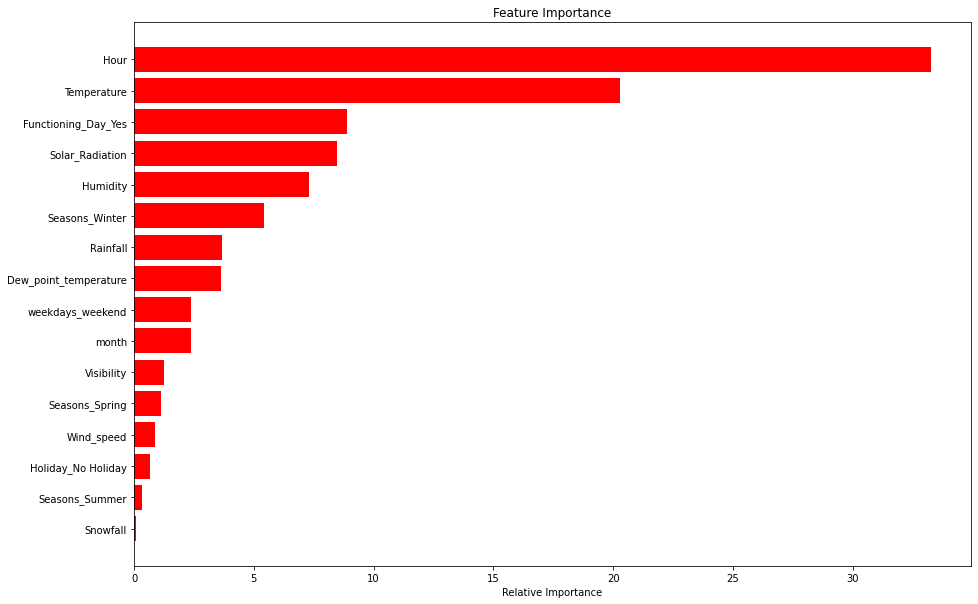

In [140]:
#getting and visualizing features importance of catboost model
get_features_importance(cb_model,X_train)

##**Combined Evaluation Matrix of All the models**

In [141]:
#creating dictionary to store all the metrices 
all_model_matrices={'Mean_square_error':mean_sq_error,'Root_Mean_square_error':root_mean_sq_error,'R2':r2_list,'Adjusted_R2':adj_r2_list}

In [142]:
#list of all model made ,'Gradient_Boosting',,'CATBoost'
model_name=['Linear','Lasso','Ridge','Elasticnet','Polynomial','Decision_Tree','Random_Forest','Gradient_Boosting','Xtreme_GB','Catboost']

In [143]:
#converting dictionary to dataframe fro easy visual
matrices_df=pd.DataFrame.from_dict(all_model_matrices,orient="index",columns=model_name)

In [144]:
matrices_df

,Linear,Lasso,Ridge,Elasticnet,Polynomial,Decision_Tree,Random_Forest,Gradient_Boosting,Xtreme_GB,Catboost
Mean_square_error,175590.552873,175560.907118,175248.935066,175346.867499,116294.537640,89841.135160,63020.688271,54976.733469,40812.801816,36706.535373
Root_Mean_square_error,419.035264,418.999889,418.627442,418.744394,341.019849,299.735108,251.039217,234.471178,202.021785,191.589497
R2,0.572911,0.572983,0.573742,0.573504,0.717137,0.780447,0.845991,0.865649,0.900262,0.910297
Adjusted_R2,0.569766,0.569839,0.570603,0.570363,0.715054,0.778831,0.844857,0.864659,0.899528,0.909637


In [145]:
#transposing matrices_df for easy and clear view and saving that as new final matrices df
final_matrices=matrices_df.transpose().reset_index().rename(columns={'index':'Models'})

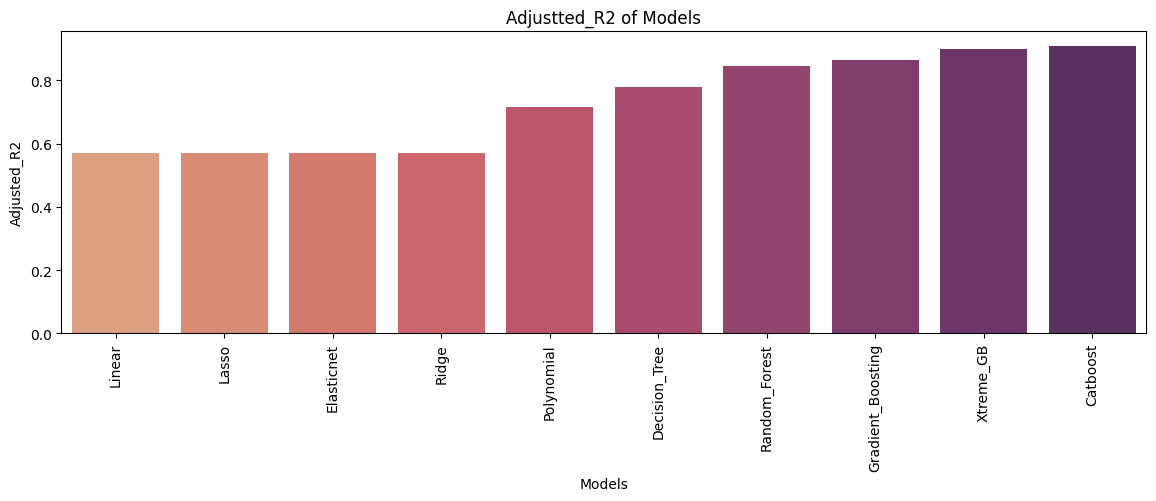

In [146]:
#creating bar plot to visualize the Adjusted R2 of model 
plt.figure(figsize=(14,4),dpi=100)
sns.barplot(x='Models',y='Adjusted_R2',data=final_matrices.sort_values('Adjusted_R2'),palette="flare").set(title='Adjustted_R2 of Models')
plt.xticks(rotation=90);